In [2]:
# import libraraies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import folium
import numpy as np
import seaborn

In [3]:
#load data from social explorer 
data_file = pd.read_csv( 'data/income_kerncounty_SL140-Copy1.csv')

### Exploration of Income data from census Explorer 
The median household income in Kern County is $58,812. The majority of households are below 50,000/yr threshold. Kern County is below CA and the US in all areas of income demographics including a higher poverty rate at 18.6% .

Source:https://www.socialexplorer.com/tables/ACS2021_5yr/R13329977
data_file.shape

In [4]:
data_file.head()

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  6029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  6029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  6029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  6029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  6029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          3903     NaN         NaN   
1         ca         140            0          3904     NaN         NaN   
2         ca         140            0          3905     NaN         NaN   
3         ca         140            0          3906     NaN         NaN   
4         ca         140            0          3907     NaN         NaN   

   Geo_DIVISION  ...  PCT_SE_A14001_008  PCT_SE_A14001_009  PCT_SE_A14001_010  \
0           NaN  ...               3.97              10.18               0.60   
1           NaN  ...               0.00               6.66               8.50   
2           NaN  ...               0.00               0.00               0.00   
3           NaN  ...               1.33               3.67               6.14   
4           NaN  ...               0.00              14.34               0.00   

   PCT_SE_A14001_011  PCT_SE_A14001_012  PCT_SE_A14001_013  PCT_SE_A14001_014  \
0               6.73              10.87               6.56              17.69   
1               3.15               7.25              30.86               4.04   
2              25.78              22.40               9.64               0.00   
3               8.37               9.22              26.69               5.36   
4              20.27              16.44              13.97              11.50   

   PCT_SE_A14001_015  PCT_SE_A14001_016  PCT_SE_A14001_017  
0               3.45               0.60               2.76  
1               0.00               0.00               1.90  
2               5.21               0.00               0.00  
3               0.96               3.07               2.65  
4               1.36               3.46               0.00  

[5 rows x 88 columns]

In [5]:
# see all the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
data_file.sample()

Geo_FIPS                                    Geo_QName Geo_FILEID  \
131  6029003305  Census Tract 33.05, Kern County, California      ACSSF   

    Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
131         ca         140            0          4034     NaN         NaN   

     Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
131           NaN          NaN          6          29         NaN        NaN   

     Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
131       3305         NaN         NaN         NaN           NaN          NaN   

     Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
131         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

     Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
131       NaN        NaN         NaN           NaN     NaN       NaN   

     Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  \
131         NaN       NaN       NaN      NaN        NaN        NaN   

     Geo_SUBMCD  Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  \
131         NaN        NaN        NaN        NaN     NaN      NaN      NaN   

     Geo_UGA  Geo_PUMA5  Geo_PUMA1           Geo_GEOID            Geo_NAME  \
131      NaN        NaN        NaN  14000US06029003305  Census Tract 33.05   

     Geo_BTTR  Geo_BTBG  Geo_PLACESE  SE_A14001_001  SE_A14001_002  \
131       NaN       NaN          NaN           1460            204   

     SE_A14001_003  SE_A14001_004  SE_A14001_005  SE_A14001_006  \
131             72            158             80             76   

     SE_A14001_007  SE_A14001_008  SE_A14001_009  SE_A14001_010  \
131             56            128             16             25   

     SE_A14001_011  SE_A14001_012  SE_A14001_013  SE_A14001_014  \
131            143            197             94             49   

     SE_A14001_015  SE_A14001_016  SE_A14001_017  PCT_SE_A14001_002  \
131             17             22            123              13.97   

     PCT_SE_A14001_003  PCT_SE_A14001_004  PCT_SE_A14001_005  \
131               4.93              10.82               5.48   

     PCT_SE_A14001_006  PCT_SE_A14001_007  PCT_SE_A14001_008  \
131               5.21               3.84               8.77   

     PCT_SE_A14001_009  PCT_SE_A14001_010  PCT_SE_A14001_011  \
131                1.1               1.71               9.79   

     PCT_SE_A14001_012  PCT_SE_A14001_013  PCT_SE_A14001_014  \
131              13.49               6.44               3.36   

     PCT_SE_A14001_015  PCT_SE_A14001_016  PCT_SE_A14001_017  
131               1.16               1.51               8.42

In [7]:
# look at the data types of data set
data_file.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    int64  
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    int64  
 12  Geo_COUNTY         236 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [8]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    int64  
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    int64  
 12  Geo_COUNTY         236 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [9]:
# geo_fips leading zero issue 
data_file.Geo_FIPS.head()

0    6029000102
1    6029000103
2    6029000104
3    6029000105
4    6029000106
Name: Geo_FIPS, dtype: int64

In [10]:
# specifying fips columns as a string 
data_file = pd.read_csv(
    'data/income_kerncounty_SL140-Copy1.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [11]:
# look at the data again
data_file.head()

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  06029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  06029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  06029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  06029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  06029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          3903     NaN         NaN   
1         ca         140            0          3904     NaN         NaN   
2         ca         140            0          3905     NaN         NaN   
3         ca         140            0          3906     NaN         NaN   
4         ca         140            0          3907     NaN         NaN   

   Geo_DIVISION  Geo_STATECE Geo_STATE Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN        06        029         NaN        NaN   
1           NaN          NaN        06        029         NaN        NaN   
2           NaN          NaN        06        029         NaN        NaN   
3           NaN          NaN        06        029         NaN        NaN   
4           NaN          NaN        06        029         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0        102         NaN         NaN         NaN           NaN          NaN   
1        103         NaN         NaN         NaN           NaN          NaN   
2        104         NaN         NaN         NaN           NaN          NaN   
3        105         NaN         NaN         NaN           NaN          NaN   
4        106         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
3         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
4         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   
3       NaN        NaN         NaN           NaN     NaN       NaN   
4       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
3         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
4         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
3        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
4        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID           Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06029000102  Census Tract 1.02       NaN   
1        NaN        NaN  14000US06029000103  Census Tract 1.03       NaN   
2        NaN        NaN  14000US06029000104  Census Tract 1.04       NaN   
3        NaN        NaN  14000US06029000105  Census Tract 1.05       N

In [12]:
# check new data types 
data_file.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    object 
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    object 
 12  Geo_COUNTY         236 non-null    object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [13]:
# Drop/delete 
data_file.columns[data_file.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [14]:
# eliminate columns with empty or missing values 
data_file = data_file.dropna(axis=1,how="all")

In [15]:
# check data 
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    object 
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_STATE          236 non-null    object 
 8   Geo_COUNTY         236 non-null    object 
 9   Geo_TRACT          236 non-null    int64  
 10  Geo_GEOID          236 non-null    object 
 11  Geo_NAME           236 non-null    object 
 12  SE_A14001_001      236 non-null    int64  
 13  SE_A14001_002      236 non-null    int64  
 14  SE_A14001_003      236 non-null    int64  
 15  SE_A14001_004      236 non-null    int64  
 16  SE_A14001_005      236 non

In [16]:
data_file.head()

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  06029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  06029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  06029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  06029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  06029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO Geo_STATE Geo_COUNTY  \
0         ca         140            0          3903        06        029   
1         ca         140            0          3904        06        029   
2         ca         140            0          3905        06        029   
3         ca         140            0          3906        06        029   
4         ca         140            0          3907        06        029   

   Geo_TRACT           Geo_GEOID           Geo_NAME  SE_A14001_001  \
0        102  14000US06029000102  Census Tract 1.02           1159   
1        103  14000US06029000103  Census Tract 1.03           1682   
2        104  14000US06029000104  Census Tract 1.04            384   
3        105  14000US06029000105  Census Tract 1.05           1660   
4        106  14000US06029000106  Census Tract 1.06            809   

   SE_A14001_002  SE_A14001_003  SE_A14001_004  SE_A14001_005  SE_A14001_006  \
0             50             96            128             49             89   
1             16             65              7            142             38   
2              0            106              0              0              0   
3             12             26            243             68             33   
4              0             51             39             11             50   

   SE_A14001_007  SE_A14001_008  SE_A14001_009  SE_A14001_010  SE_A14001_011  \
0             12             46            118              7             78   
1            365              0            112            143             53   
2             36              0              0              0             99   
3            158             22             61            102            139   
4              0              0            116              0            164   

   SE_A14001_012  SE_A14001_013  SE_A14001_014  SE_A14001_015  SE_A14001_016  \
0            126             76            205             40              7   
1            122            519             68              0              0   
2             86             37              0             20              0   
3            153            443             89             16             51   
4            133            113             93             11             28   

   SE_A14001_017  PCT_SE_A14001_002  PCT_SE_A14001_003  PCT_SE_A14001_004  \
0             32               4.31               8.28              11.04   
1             32               0.95               3.86               0.42   
2              0               0.00              27.60               0.00   
3             44               0.72               1.57              14.64   
4              0               0.00               6.30               4.82   

   PCT_SE_A14001_005  PCT_SE_A14001_006  PCT_SE_A14001_007  PCT_SE_A14001_008  \
0               4.23               7.68               1.04               3.97   
1               8.44               2.26              21.70               0.00   
2               0.00               0.00               9.38               0.00   
3               4.10               1.99               9.52               1.33   
4               1.36               6.18               0.00               0.00   

   PCT_SE_A14001_009  PCT_SE_A14001_010  PCT_SE_A14001_011  PCT_SE_A14001_012  \
0              10.18               0.60               6.73              10.87   
1               6.66               8.50               3.15               7.25   
2               0.00               0.00              

In [17]:
# looking at income in kern county
# defining the columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_001',    
                   'SE_A14001_002',    
                   'SE_A14001_003',   
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',   
                   'SE_A14001_007', 
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010', 
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013', 
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017']


In [18]:
# add to a new data frame 
data_file2 = data_file[columns_to_keep]

In [19]:
# check data 
data_file2.head()

Geo_FIPS  SE_A14001_001  SE_A14001_002  SE_A14001_003  SE_A14001_004  \
0  06029000102           1159             50             96            128   
1  06029000103           1682             16             65              7   
2  06029000104            384              0            106              0   
3  06029000105           1660             12             26            243   
4  06029000106            809              0             51             39   

   SE_A14001_005  SE_A14001_006  SE_A14001_007  SE_A14001_008  SE_A14001_009  \
0             49             89             12             46            118   
1            142             38            365              0            112   
2              0              0             36              0              0   
3             68             33            158             22             61   
4             11             50              0              0            116   

   SE_A14001_010  SE_A14001_011  SE_A14001_012  SE_A14001_013  SE_A14001_014  \
0              7             78            126             76            205   
1            143             53            122            519             68   
2              0             99             86             37              0   
3            102            139            153            443             89   
4              0            164            133            113             93   

   SE_A14001_015  SE_A14001_016  SE_A14001_017  
0             40              7             32  
1              0              0             32  
2             20              0              0  
3             16             51             44  
4             11             28              0

In [20]:
# rename columns with descriptive categories
data_file2.columns.to_list()

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [21]:
data_file2.columns = ['FIPS',
'Total Households',
'Below 10K',
'10K - 14.9K',
'15K - 19.9K',
'20K - 24.9K',
'25K - 29.9K',
'30K - 34.9K',
'35K - 39.9K',
'40K - 44.9K',
'45K - 49.9K',
'50K - 59.9K',
'60K - 64.9K',
'75K - 99.9K',
'100K - 124.9K',
'125K - 149.9K',
'150K - 199.9K',
'200K and above']

In [22]:
# check data for new column categories 
data_file2.head()

FIPS  Total Households  Below 10K  10K - 14.9K  15K - 19.9K  \
0  06029000102              1159         50           96          128   
1  06029000103              1682         16           65            7   
2  06029000104               384          0          106            0   
3  06029000105              1660         12           26          243   
4  06029000106               809          0           51           39   

   20K - 24.9K  25K - 29.9K  30K - 34.9K  35K - 39.9K  40K - 44.9K  \
0           49           89           12           46          118   
1          142           38          365            0          112   
2            0            0           36            0            0   
3           68           33          158           22           61   
4           11           50            0            0          116   

   45K - 49.9K  50K - 59.9K  60K - 64.9K  75K - 99.9K  100K - 124.9K  \
0            7           78          126           76            205   
1          143           53          122          519             68   
2            0           99           86           37              0   
3          102          139          153          443             89   
4            0          164          133          113             93   

   125K - 149.9K  150K - 199.9K  200K and above  
0             40              7              32  
1              0              0              32  
2             20              0               0  
3             16             51              44  
4             11             28               0

In [23]:
# review descriptive stats
data_file2['Total Households'].describe()

count     236.000000
mean     1164.004237
std       440.040632
min         0.000000
25%       872.250000
50%      1104.500000
75%      1460.250000
max      3010.000000
Name: Total Households, dtype: float64

<AxesSubplot: ylabel='Frequency'>

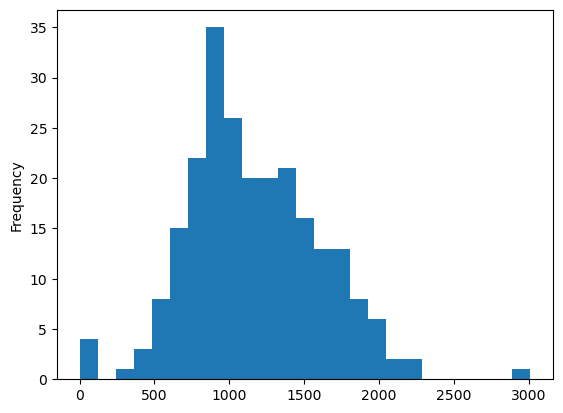

In [24]:
# plot as a histogram with 50 bins
data_file2['Total Households'].plot.hist(bins=25)

<AxesSubplot: xlabel='15K - 19.9K', ylabel='200K and above'>

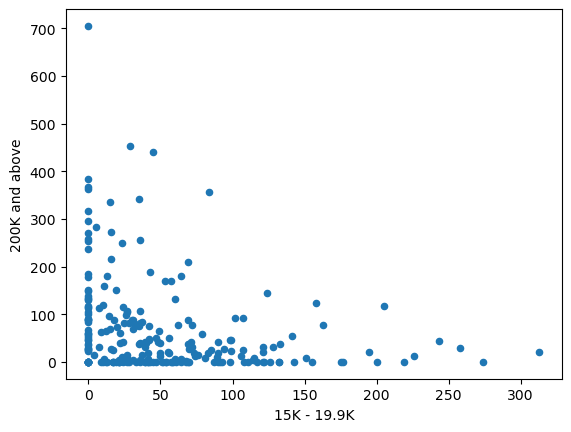

In [25]:
# scatter plot of under 10k vs 200k+
data_file2.plot.scatter(x='15K - 19.9K',y='200K and above')

In [26]:
# sort data to find census tracts with the lowest income, under 19.9k
# sort data to find census tracts with highest income, 200k+
df2_sorted = data_file2.sort_values(by='15K - 19.9K',ascending = False)

In [27]:
# Review data 
df2_sorted[['15K - 19.9K','Total Households']].head(10)

15K - 19.9K  Total Households
6            313              1231
44           274              1324
179          258              1852
3            243              1660
8            226              1651
231          219              1069
194          205              2099
178          200              1023
43           195              1721
166          177              1429

In [28]:
df2_sorted = data_file2.sort_values(by='200K and above',ascending = False)

In [29]:
df2_sorted[['200K and above','Total Households']].head()

200K and above  Total Households
118             705              1823
152             454              1424
77              441              1313
85              383              2016
143             366              2075

In [30]:
# subset the data so that we can see the data per row... 
# show the values in my dataframe that match this filter
data_file2[data_file2['Total Households']==0]

FIPS  Total Households  Below 10K  10K - 14.9K  15K - 19.9K  \
162  06029004302                 0          0            0            0   
170  06029004601                 0          0            0            0   
171  06029004603                 0          0            0            0   
215  06029006002                 0          0            0            0   

     20K - 24.9K  25K - 29.9K  30K - 34.9K  35K - 39.9K  40K - 44.9K  \
162            0            0            0            0            0   
170            0            0            0            0            0   
171            0            0            0            0            0   
215            0            0            0            0            0   

     45K - 49.9K  50K - 59.9K  60K - 64.9K  75K - 99.9K  100K - 124.9K  \
162            0            0            0            0              0   
170            0            0            0            0              0   
171            0            0            0            0              0   
215            0            0            0            0              0   

     125K - 149.9K  150K - 199.9K  200K and above  
162              0              0               0  
170              0              0               0  
171              0              0               0  
215              0              0               0

In [31]:
# create new variable for census tracts with zero pop
data_file_no_pop = data_file2[data_file2['Total Households']==0]

In [32]:
# how many records with zero pop
print('There are ' + str(len(data_file_no_pop)) + ' census tracts with no people in them')


There are 4 census tracts with no people in them


In [33]:
# show which census tracts
data_file_no_pop[['FIPS','Total Households']]

FIPS  Total Households
162  06029004302                 0
170  06029004601                 0
171  06029004603                 0
215  06029006002                 0

<AxesSubplot: xlabel='FIPS'>

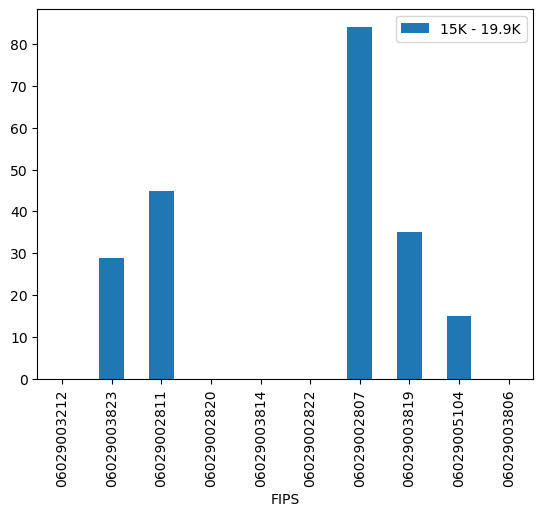

In [34]:
# use a bar graph to show under 10k and 200k+ income
df2_sorted.head(10).plot.bar(x='FIPS',
                     y='15K - 19.9K',
                     )

In [35]:
data_file2.columns.to_list()

['FIPS',
 'Total Households',
 'Below 10K',
 '10K - 14.9K',
 '15K - 19.9K',
 '20K - 24.9K',
 '25K - 29.9K',
 '30K - 34.9K',
 '35K - 39.9K',
 '40K - 44.9K',
 '45K - 49.9K',
 '50K - 59.9K',
 '60K - 64.9K',
 '75K - 99.9K',
 '100K - 124.9K',
 '125K - 149.9K',
 '150K - 199.9K',
 '200K and above']

Subsetting data into 4 buckets for income and creating charts. 
The median household income in Kern County is below 50K so we want to creat visuals that show this stark income distribution.

In [36]:
from matplotlib import pyplot as plt

In [37]:
df2_sorted['below 50k']= df2_sorted[['Below 10K',
 '10K - 14.9K',
 '15K - 19.9K',
 '20K - 24.9K',
 '25K - 29.9K',
 '30K - 34.9K',
 '35K - 39.9K',
 '40K - 44.9K',
 '45K - 49.9K']].sum(axis=1)

# 50k - 100k
df2_sorted['50k - 100k']= df2_sorted[['50K - 59.9K',
 '60K - 64.9K',
 '75K - 99.9K']].sum(axis=1)

#100k - 200k
df2_sorted['100k - 200k']= df2_sorted[['100K - 124.9K',
 '125K - 149.9K',
 '150K - 199.9K']].sum(axis=1)

#200k
df2_sorted['200K+']= df2_sorted[['200K and above']].sum(axis=1)
df2_sorted.head()

FIPS  Total Households  Below 10K  10K - 14.9K  15K - 19.9K  \
118  06029003212              1823         40            0            0   
152  06029003823              1424         22            0           29   
77   06029002811              1313         21            7           45   
85   06029002820              2016         13           78            0   
143  06029003814              2075          0            0            0   

     20K - 24.9K  25K - 29.9K  30K - 34.9K  35K - 39.9K  40K - 44.9K  \
118            0            0           27           15            0   
152            0            0            0           15           22   
77             0           13            0            7           14   
85             0           64           54            0            0   
143            2            0           41            0           95   

     45K - 49.9K  50K - 59.9K  60K - 64.9K  75K - 99.9K  100K - 124.9K  \
118            0           24           64          305            158   
152            0           19           63          359            106   
77            54          105           64          111             86   
85            23          283           98          366            220   
143            0           72          221          311             83   

     125K - 149.9K  150K - 199.9K  200K and above  below 50k  50k - 100k  \
118            286            199             705         82         393   
152             40            295             454         88         441   
77             118            227             441        161         280   
85             192            242             383        232         747   
143            515            369             366        138         604   

     100k - 200k  200K+  
118          643    705  
152          441    454  
77           431    441  
85           654    383  
143          967    366

In [38]:
df3=df2_sorted[['below 50k','50k - 100k','100k - 200k','200K+']]
df3.head()

below 50k  50k - 100k  100k - 200k  200K+
118         82         393          643    705
152         88         441          441    454
77         161         280          431    441
85         232         747          654    383
143        138         604          967    366

In [39]:
df4=df3[['below 50k','50k - 100k','100k - 200k','200K+']].sum(axis=1)
df4.head()

118    1823
152    1424
77     1313
85     2016
143    2075
dtype: int64

<AxesSubplot: >

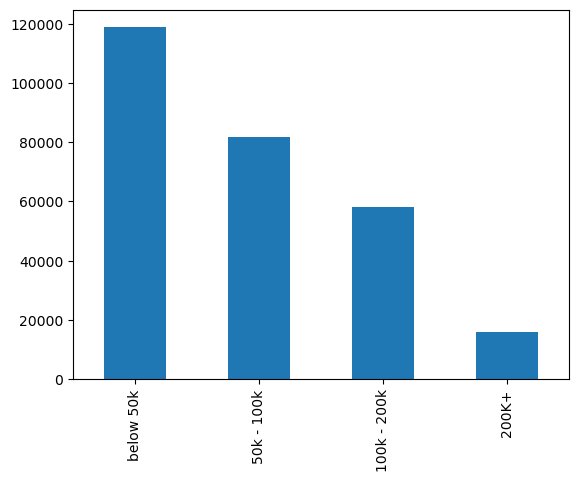

In [40]:
#figure, ax = plt.subplots(1,1)
df3[['below 50k','50k - 100k','100k - 200k','200K+']].sum().plot.bar()

In [41]:
import plotly.express as px

In [42]:
pd.options.plotting.backend = "plotly"

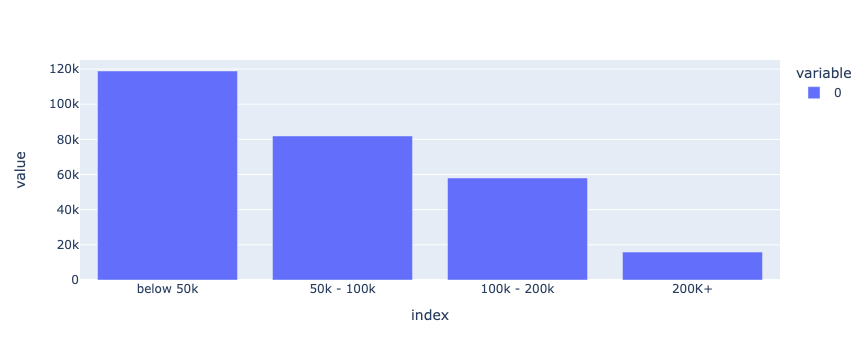

In [43]:
df3[['below 50k','50k - 100k','100k - 200k','200K+']].sum().plot(kind='bar')

### Geojson data inspection
Add Geojson data of income from census reporter 

source: https://censusreporter.org/data/table/?table=B19013&geo_ids=05000US06029,140|05000US06029&primary_geo_id=05000US06029

In [44]:
import geopandas as gpd

In [45]:
# read in a geojson file downloaded from census reporter
kernincome=gpd.read_file('data/incomeacs2021.geojson')
kernincome.head()

geoid                         name  B19013001  \
0        05000US06029              Kern County, CA    58824.0   
1  14000US06029000102  Census Tract 1.02, Kern, CA    44820.0   
2  14000US06029000103  Census Tract 1.03, Kern, CA    47500.0   
3  14000US06029000104  Census Tract 1.04, Kern, CA    51786.0   
4  14000US06029000105  Census Tract 1.05, Kern, CA    58559.0   

   B19013001, Error                                           geometry  
0            1190.0  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...  
1           19178.0  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...  
2           27368.0  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...  
3            7888.0  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...  
4           17424.0  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...

<AxesSubplot: >

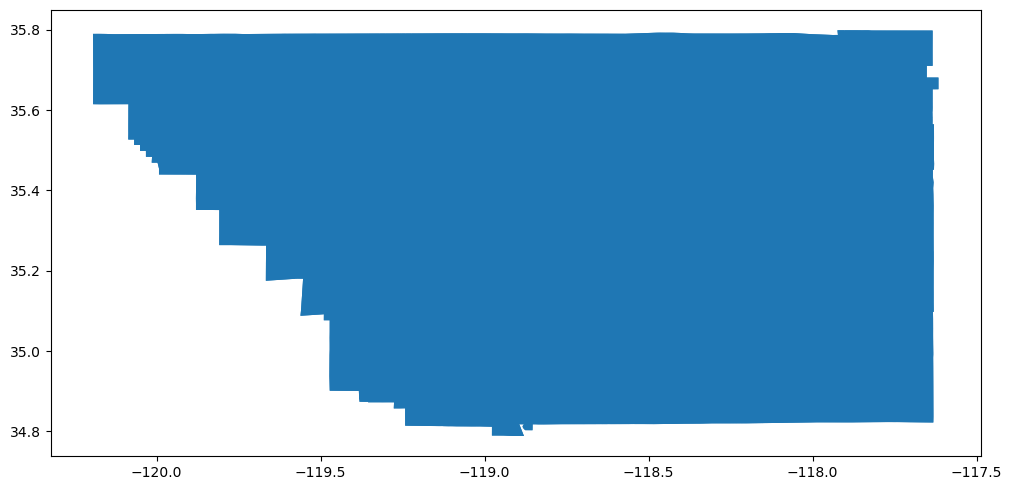

In [46]:
# plot data
kernincome.plot(figsize=(12,10))

In [47]:
# inspect dataset
kernincome.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             237 non-null    object  
 1   name              237 non-null    object  
 2   B19013001         230 non-null    float64 
 3   B19013001, Error  230 non-null    float64 
 4   geometry          237 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 9.4+ KB


In [48]:
# keep geoid and geometry and subset the data
kernincome = kernincome[['geoid','geometry']]
kernincome.head()

geoid                                           geometry
0        05000US06029  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...
1  14000US06029000102  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...
2  14000US06029000103  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...
3  14000US06029000104  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...
4  14000US06029000105  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...

In [49]:
# Creating FIPS variable from Census Reporter geojson using the 'geoid' variable
kernincome['FIPS'] = kernincome['geoid']
kernincome['FIPS'].head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0          05000US06029
1    14000US06029000102
2    14000US06029000103
3    14000US06029000104
4    14000US06029000105
Name: FIPS, dtype: object

In [50]:
# Isolating rows to create a 'FIPS' variable without row 0 (County) and creating new 'FIPS' variable
kernincome = kernincome.loc[1:236].copy()

In [51]:
# Remove extra characters from new 'FIPS'
kernincome['FIPS'] = '0'+kernincome['FIPS'].str.lstrip('14000US')
kernincome['FIPS'].copy()

1      06029000102
2      06029000103
3      06029000104
4      06029000105
5      06029000106
6      06029000201
7      06029000202
8      06029000300
9      06029000400
10     06029000504
11     06029000505
12     06029000506
13     06029000507
14     06029000508
15     06029000509
16     06029000510
17     06029000601
18     06029000602
19     06029000603
20     06029000701
21     06029000702
22     06029000800
23     06029000902
24     06029000903
25     06029000904
26     06029000905
27     06029000906
28     06029000907
29     06029000908
30     06029000909
31     06029000911
32     06029000912
33     06029000913
34     06029000914
35     06029001001
36     06029001002
37     06029001003
38     06029001101
39     06029001104
40     06029001105
41     06029001106
42     06029001107
43     06029001201
44     06029001202
45     06029001301
46     06029001302
47     06029001401
48     06029001402
49     06029001500
50     06029001600
51     06029001700
52     06029001801
53     06029

In [52]:
# Merging Census Tract shapefile with Income data for kern County
kern_income_tracts = kernincome.merge(df2_sorted,on="FIPS")
## Confirming that the data has been merged
kern_income_tracts.tail()


geoid                                           geometry  \
231  14000US06029006404  MULTIPOLYGON (((-118.93218 35.23783, -118.9321...   
232  14000US06029006405  MULTIPOLYGON (((-118.93211 35.27421, -118.9321...   
233  14000US06029006406  MULTIPOLYGON (((-118.91441 35.25257, -118.9144...   
234  14000US06029006500  MULTIPOLYGON (((-118.30742 34.97458, -118.3069...   
235  14000US06029006600  MULTIPOLYGON (((-119.64703 35.49928, -119.6469...   

            FIPS  Total Households  Below 10K  10K - 14.9K  15K - 19.9K  \
231  06029006404              1069        144          163          219   
232  06029006405               608         28           10           27   
233  06029006406              1044        145           46          143   
234  06029006500               952        172            0           26   
235  06029006600              1181         26           70           36   

     20K - 24.9K  25K - 29.9K  30K - 34.9K  35K - 39.9K  40K - 44.9K  \
231           56           69           58           88           47   
232           47           52           40           10           51   
233          116           39          188           18           34   
234          127           55           73           10           41   
235           64           73           54           37           67   

     45K - 49.9K  50K - 59.9K  60K - 64.9K  75K - 99.9K  100K - 124.9K  \
231           41           79           31           45             14   
232           56           49          135           77             19   
233           66          111           93            6             20   
234           33           94           77           93             55   
235           93           96          102          118            164   

     125K - 149.9K  150K - 199.9K  200K and above  below 50k  50k - 100k  \
231             12              3               0        885         155   
232              0              7               0        321         261   
233             19              0               0        795         210   
234             70             17               9        537         264   
235             98             44              39        520         316   

     100k - 200k  200K+  
231           29      0  
232           26      0  
233           39      0  
234          142      9  
235          306     39

In [53]:
kern_income_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             236 non-null    object  
 1   geometry          236 non-null    geometry
 2   FIPS              236 non-null    object  
 3   Total Households  236 non-null    int64   
 4   Below 10K         236 non-null    int64   
 5   10K - 14.9K       236 non-null    int64   
 6   15K - 19.9K       236 non-null    int64   
 7   20K - 24.9K       236 non-null    int64   
 8   25K - 29.9K       236 non-null    int64   
 9   30K - 34.9K       236 non-null    int64   
 10  35K - 39.9K       236 non-null    int64   
 11  40K - 44.9K       236 non-null    int64   
 12  45K - 49.9K       236 non-null    int64   
 13  50K - 59.9K       236 non-null    int64   
 14  60K - 64.9K       236 non-null    int64   
 15  75K - 99.9K       236 non-null    int64   
 16  100K - 124.9K     

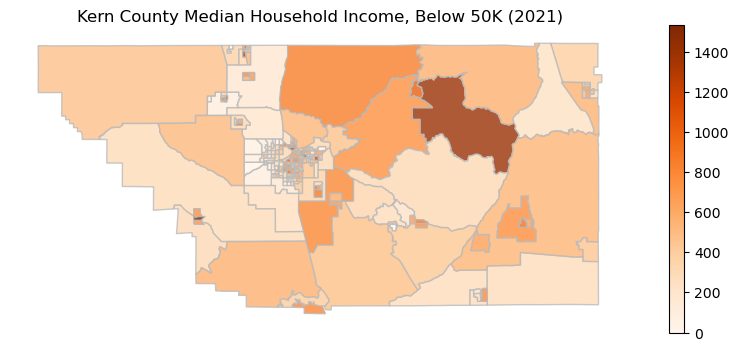

In [54]:
# Static Map of income
fig,ax = plt.subplots(figsize=(10,4))
kern_income_tracts.plot(ax=ax,
                        column='below 50k',
                        edgecolor='#bbb',  
                        cmap='Oranges', 
                        alpha=0.8,
                        legend=True)
ax.axis('off')
ax.set_title('Kern County Median Household Income, Below 50K (2021)')
plt.savefig("KernIncomeBelow50K.jpg")

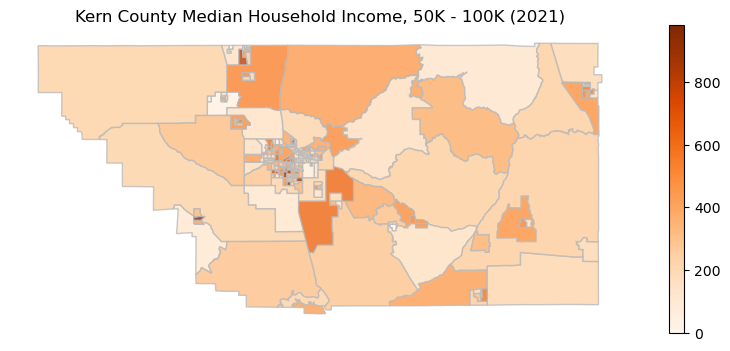

In [55]:
# Static Map of income
fig,ax = plt.subplots(figsize=(10,4))
kern_income_tracts.plot(ax=ax,
                        column='50k - 100k',
                        edgecolor='#bbb',  
                        cmap='Oranges', 
                        alpha=0.8,
                        legend=True)
ax.axis('off')
ax.set_title('Kern County Median Household Income, 50K - 100K (2021)')
plt.savefig("KernIncome50K-100K.jpg")

Text(0.5, 1.0, 'Kern County Median Household Income,100k - 200k (2021)')

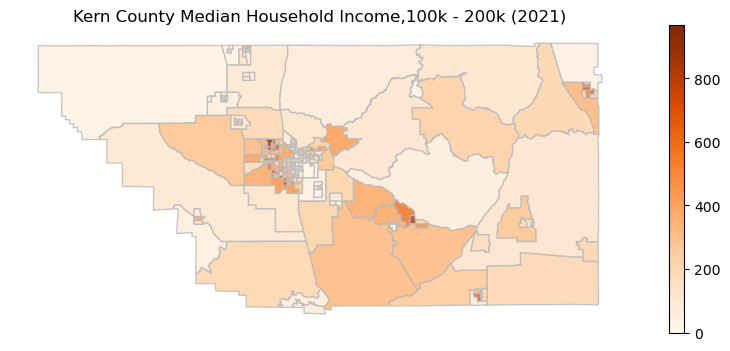

In [56]:
# Static Map of income
fig,ax = plt.subplots(figsize=(10,4))
kern_income_tracts.plot(ax=ax,
                        column='100k - 200k',
                        edgecolor='#bbb',  
                        cmap='Oranges', 
                        alpha=0.8,
                        legend=True)
ax.axis('off')
ax.set_title('Kern County Median Household Income,100k - 200k (2021)')

Text(0.5, 1.0, 'Kern County Median Household Income, 200K+ (2021)')

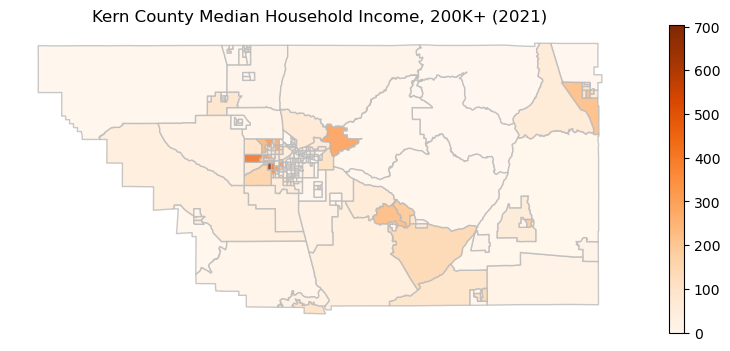

In [67]:
# Static Map of income
fig,ax = plt.subplots(figsize=(10,4))
kern_income_tracts.plot(ax=ax,
                        column='200K+',
                        edgecolor='#bbb',  
                        cmap='Oranges', 
                        alpha=0.8,
                        legend=True)
ax.axis('off')
ax.set_title('Kern County Median Household Income, 200K+ (2021)')

### Median Household Income in Kern County
i used the subsetted income data to produce 4 maps of the income distribution in Kern County. Household
incomes below 50K are seen in the rural areas in the east and west primarily up near the Squirrel Mountain
Valley, parts of Delano in the northwest, and in small census tracts within the major city of Bakersfield. Overall, we see that the trend towards more lower household incomes which is consistent with demographic data that shows that most households in the county are below the 50k threshold.


In [68]:
m = folium.Map(location=[34.2,-118.2],
zoom_start = 8,
tiles='CartoDB positron',
attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
geo_data=kern_income_tracts, 
data=kern_income_tracts,
key_on='feature.properties.FIPS',
columns=['FIPS', 'below 50k'], 
fill_color='YlOrRd',
line_weight=0.8,
fill_opacity=0.8,
line_opacity=0.2, 
legend_name=('Kern County Median Household Income, Below 50K (2021)')).add_to(m) 
m

In [69]:
m.save('IncomeBelow50kern.html')

In [70]:
m = folium.Map(location=[34.2,-118.2],
zoom_start = 8,
tiles='CartoDB positron',
attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
geo_data=kern_income_tracts, 
data=kern_income_tracts,
key_on='feature.properties.FIPS',
columns=['FIPS', '50k - 100k'], 
fill_color='YlOrRd',
line_weight=0.8,
fill_opacity=0.8,
line_opacity=0.2, 
legend_name=('Kern County Median Household Income, Below 50K - 100K (2021)')).add_to(m) 
m

### Assignment Group Summary
Group name: Environmental Justice In Kern County

Members: Yesenia Becerra, Dinah Dominguez, Melody Ng, Nick Stewart-Bloch

My Contributions: I explored and mapped demographic data- household income and nativity data (created tables, charts, static and interactive maps). I attempted to use calenvrioscreen 4.0 data to show how these demographics relate to pollution burden but I could not produce anything useful. All exploratory notebooks are in Final draft folder.